In [1]:
import os
os.chdir(os.path.expanduser("~/ppi-core-genes"))
from speos.benchmark import TestBench


/home/icb/florin.ratajczak/anaconda3/envs/compat/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  /opt/conda/conda-bld/pytorch_1614378098133/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
tb = TestBench(config_path="/home/icb/florin.ratajczak/ppi-core-genes/configs_benchmark/testbench_config_cardiovascular.yaml", parameter_file="/home/icb/florin.ratajczak/ppi-core-genes/configs_benchmark/testbench_gpu_benchmark_parameters.yaml")

In [3]:
tb.compile_configs()
tb.compile_resultshandlers()

In [4]:
tb.configs[0]

{'name': 'cardiovascular_gpu_benchmark_breadthrep0',
 'cuda': 'auto',
 'timestamp': 1666179561.089621,
 'crossval': {'mode': 'kfold',
  'n_folds': 4,
  'seed': 1,
  'positive_only': False,
  'suffix': '_fold_{}',
  'outer_suffix': '_outer_{}',
  'key': '_outer_{}'},
 'input': {'adjacency': 'all',
  'adjacency_field': 'name',
  'adjacency_blacklist': ['recon3d', 'string'],
  'adjacency_mappings': 'speos/adjacencies.json',
  'randomize_adjacency_percent': 0,
  'force_multigraph': False,
  'gene_sets': './data/mendelian_gene_sets',
  'use_gwas': True,
  'gwas': './data/gwas',
  'gwas_mappings': './speos/mapping.json',
  'use_expression': True,
  'log_expression': False,
  'use_embeddings': False,
  'tag': 'Cardiovascular',
  'field': 'ground_truth',
  'holdout_size': 0.1,
  'holdout_positive_only': True,
  'save_data': True,
  'save_dir': '/lustre/groups/epigenereg01/projects/ppi-florin/data/',
  'key': 'all'},
 'model': {'model': 'SimpleModel',
  'architecture': 'GeneNetwork',
  'args': 

In [5]:
from speos.utils.datahandlers import ResultsHandler
handler = ResultsHandler("/lustre/groups/epigenereg01/projects/ppi-florin/results/input_cardiovascular_benchmark_ablation_basics_breadthrep0.h5", read_only=True)

In [6]:
from speos.preprocessing.preprocessor import PreProcessor
from speos.preprocessing.mappers import *

mappings = GWASMapper().get_mappings(
            tb.configs[0].input.tag, fields=tb.configs[0].input.field)

adjacencies = AdjacencyMapper(tb.configs[0].input.adjacency_mappings, blacklist=tb.configs[0].input.adjacency_blacklist).get_mappings(tb.configs[0].input.adjacency, fields=tb.configs[0].input.adjacency_field)

prepro = PreProcessor(config = tb.configs[0], adjacency_list=adjacencies, mapping_list=mappings)
prepro.build_graph(features=True)
X, y, adj = prepro.get_data()

In [8]:
hgncs = list(prepro.hgnc2id.keys())

In [9]:

prepro.G.degree[prepro.hgnc2id["MTOR"]]
import numpy as np

In [10]:
X.shape

(17320, 96)

In [7]:
train_pos=[]
train_unk=[]
holdout_pos=[]
holdout_unk=[]
for hgnc in hgncs:
    results = handler.get_results_for_gene(hgnc).squeeze() # ["truth", "decision", "prediction", "train", "val", "test"]
    degree = prepro.G.degree[prepro.hgnc2id[hgnc]]
    if results[0, 0] == 1:
        if results[:,3].sum() >= 1:
            train_pos.append((degree, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_pos.append((degree, results[:,2][results[:,4].astype(np.bool8()) + results[:,5].astype(np.bool8())].mean().item()))
    else:
        if results[:,3].sum() >= 1:
            train_unk.append((degree, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_unk.append((degree, results[:,2][(results[:,4] + results[:,5]).astype(np.bool8)].mean().item()))

NameError: name 'hgncs' is not defined

In [156]:
m, b = np.polyfit(np.log10(np.asarray(x_vals) + 1), y_vals, 1)



In [158]:
m

0.11345440642270796

In [129]:
color = [*["orange" for _ in train_pos], *["blue" for _ in train_unk]]

In [134]:
len(color)

13919

In [130]:
y_vals = [y for x, y in [*train_pos, *train_unk]]

In [131]:
len(y_vals)

13919

In [132]:
x_vals = [x for x, y in [*train_pos, *train_unk]]

In [133]:
len(x_vals)

13919

(0.0, 1.0)

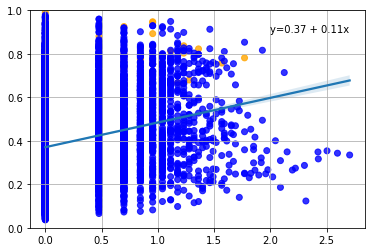

In [168]:
import seaborn as sns
ax = sns.regplot(x=np.log10(np.asarray(x_vals) +1), y=y_vals, scatter_kws={"color":color})
m, b = np.polyfit(np.log10(np.asarray(x_vals) + 1), y_vals, 1)
ax.text(2.0,0.9, "y={:.2f} + {:.2f}x".format(b.item(), m.item()))
ax.grid(zorder=-5)
ax.set_ylim((0,1))

(0.0, 1.0)

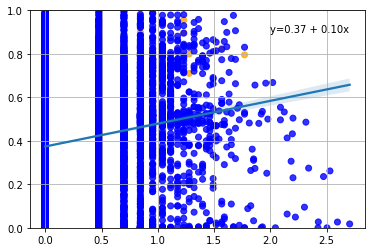

In [169]:
color = [*["orange" for _ in holdout_pos], *["blue" for _ in holdout_unk]]
y_vals = [y for x, y in [*holdout_pos, *holdout_unk]]
x_vals = [x for x, y in [*holdout_pos, *holdout_unk]]

ax = sns.regplot(x=np.log10(np.asarray(x_vals) +1), y=y_vals, scatter_kws={"color":color})
m, b = np.polyfit(np.log10(np.asarray(x_vals) + 1), y_vals, 1)
ax.text(2.0,0.9, "y={:.2f} + {:.2f}x".format(b.item(), m.item()))
ax.grid(zorder=-5)
ax.set_ylim((0,1))

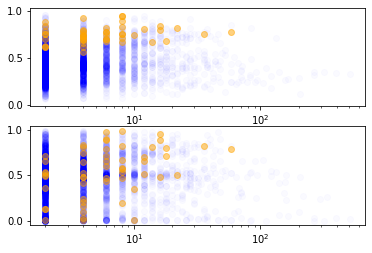

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1)
axes[0].scatter(x=[x for x, y in train_unk], y = [y for x, y in train_unk], color="blue",alpha=0.02)
axes[0].axline((0, 0.387), slope=0.00114252)
axes[0].scatter(x=[x for x, y in train_pos], y = [y for x, y in train_pos], color="orange",alpha=0.5)
axes[0].set_xscale('log')

axes[1].scatter(x=[x for x, y in holdout_unk], y = [y for x, y in holdout_unk], color="blue",alpha=0.02)
axes[1].scatter(x=[x for x, y in holdout_pos], y = [y for x, y in holdout_pos], color="orange",alpha=0.5)
axes[1].set_xscale('log')


In [117]:
from sklearn.linear_model import LinearRegression as linreg
reg = linreg().fit(X=xs.reshape(-1, 1), y = ys)

In [116]:
ys = np.asarray([y for x, y in train_unk])
xs = np.asarray([x for x, y in train_unk])
xs = xs[~np.isnan(ys)]
ys = ys[~np.isnan(ys)]

In [114]:
xs = np.asarray([x for x, y in train_unk])
xs = xs[~np.isnan(xs)]

In [118]:
reg.coef_

array([0.00114252])

In [119]:
reg.intercept_

0.3870685388776473

In [128]:
np.isnan(train_unk).sum()/len(train_unk)

0.0

In [91]:
prepro.get_feature_names()

['NSNPS TRIG',
 'ZSTAT TRIG',
 'P TRIG',
 'NSNPS CAD',
 'ZSTAT CAD',
 'P CAD',
 'NSNPS LDL',
 'ZSTAT LDL',
 'P LDL',
 'NSNPS HDL',
 'ZSTAT HDL',
 'P HDL',
 'NSNPS RBC',
 'ZSTAT RBC',
 'P RBC',
 'NSNPS PLT',
 'ZSTAT PLT',
 'P PLT',
 'NSNPS HR',
 'ZSTAT HR',
 'P HR',
 'NSNPS BW',
 'ZSTAT BW',
 'P BW',
 'Adipose - Subcutaneous',
 'Adipose - Visceral (Omentum)',
 'Adrenal Gland',
 'Artery - Aorta',
 'Artery - Coronary',
 'Artery - Tibial',
 'Bladder',
 'Brain - Amygdala',
 'Brain - Anterior cingulate cortex (BA24)',
 'Brain - Caudate (basal ganglia)',
 'Brain - Cerebellar Hemisphere',
 'Brain - Cerebellum',
 'Brain - Cortex',
 'Brain - Frontal Cortex (BA9)',
 'Brain - Hippocampus',
 'Brain - Hypothalamus',
 'Brain - Nucleus accumbens (basal ganglia)',
 'Brain - Putamen (basal ganglia)',
 'Brain - Spinal cord (cervical c-1)',
 'Brain - Substantia nigra',
 'Breast - Mammary Tissue',
 'Cells - EBV-transformed lymphocytes',
 'Cells - Transformed fibroblasts',
 'Cervix - Ectocervix',
 'Cervix -

In [11]:
import pandas as pd
gwas = pd.read_csv("/home/icb/florin.ratajczak/ppi-core-genes/data/gwas/FG.genes.out", sep=" ", header=0, index_col=0)

In [40]:
gwas.head()

,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,P
GENE,,,,,,,,
105378947,1,586287,611297,7,3,46186,-1.5881,0.94387
105378580,1,803398,805130,4,2,46186,-3.5945,0.99984
148398,1,925741,944581,51,16,46186,-3.7928,0.99993
26155,1,944203,959299,41,9,46186,-2.3644,0.99097
339451,1,959952,965720,15,3,46186,-1.8504,0.96787


In [9]:
id2entrez = {value: key for key, value in prepro.entrez2id.items()}

In [38]:
id2entrez

{0: 1,
 1: 29974,
 2: 2,
 3: 144568,
 4: 127550,
 5: 53947,
 6: 51146,
 7: 8086,
 8: 65985,
 9: 13,
 10: 344752,
 11: 126767,
 12: 343066,
 13: 51166,
 14: 79719,
 15: 22848,
 16: 28971,
 17: 14,
 18: 15,
 19: 25980,
 20: 441376,
 21: 16,
 22: 57505,
 23: 80755,
 24: 132949,
 25: 60496,
 26: 10157,
 27: 9625,
 28: 18,
 29: 19,
 30: 20,
 31: 21,
 32: 24,
 33: 23461,
 34: 23460,
 35: 10347,
 36: 10351,
 37: 10350,
 38: 10349,
 39: 26154,
 40: 154664,
 41: 5243,
 42: 5244,
 43: 340273,
 44: 10058,
 45: 11194,
 46: 23457,
 47: 23456,
 48: 8647,
 49: 4363,
 50: 1244,
 51: 8714,
 52: 10257,
 53: 10057,
 54: 368,
 55: 6833,
 56: 10060,
 57: 89845,
 58: 85320,
 59: 94160,
 60: 225,
 61: 5825,
 62: 5826,
 63: 6059,
 64: 23,
 65: 10061,
 66: 55324,
 67: 9619,
 68: 9429,
 69: 64137,
 70: 64240,
 71: 64241,
 72: 84696,
 73: 11057,
 74: 171586,
 75: 63874,
 76: 51099,
 77: 57406,
 78: 79575,
 79: 55347,
 80: 83451,
 81: 26090,
 82: 145447,
 83: 84945,
 84: 25864,
 85: 84836,
 86: 116236,
 87: 7920,

In [42]:
train_pos=[]
train_unk=[]
holdout_pos=[]
holdout_unk=[]
for hgnc in hgncs:
    results = handler.get_results_for_gene(hgnc).squeeze() # ["truth", "decision", "prediction", "train", "val", "test"]
    entrez = id2entrez[prepro.hgnc2id[hgnc]]
    value = gwas.loc[entrez, "ZSTAT"]
    if results[0, 0] == 1:
        if results[:,3].sum() >= 1:
            train_pos.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_pos.append((value, results[:,2][results[:,4].astype(np.bool8()) + results[:,5].astype(np.bool8())].mean().item()))
    else:
        if results[:,3].sum() >= 1:
            train_unk.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_unk.append((value, results[:,2][(results[:,4] + results[:,5]).astype(np.bool8)].mean().item()))

In [11]:
orange = '#ffb30f'
darkblue = '#01295f'
lightblue = '#437f97'
from scipy.stats import kendalltau, spearmanr

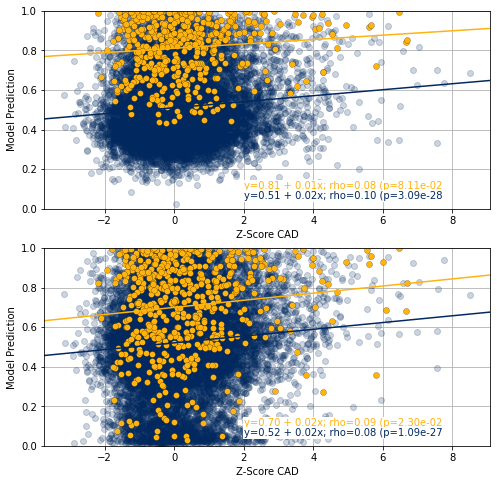

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

gwas = pd.read_csv("/home/icb/florin.ratajczak/ppi-core-genes/data/gwas/CAD.genes.out", sep=" ", header=0, index_col=0)
id2entrez = {value: key for key, value in prepro.entrez2id.items()}

train_pos=[]
train_unk=[]
holdout_pos=[]
holdout_unk=[]

for hgnc in hgncs:
    results = handler.get_results_for_gene(hgnc).squeeze() # ["truth", "decision", "prediction", "train", "val", "test"]
    entrez = id2entrez[prepro.hgnc2id[hgnc]]
    value = gwas.loc[entrez, "ZSTAT"]
    if results[0, 0] == 1:
        if results[:,3].sum() >= 1:
            train_pos.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_pos.append((value, results[:,2][results[:,4].astype(np.bool8()) + results[:,5].astype(np.bool8())].mean().item()))
    else:
        if results[:,3].sum() >= 1:
            train_unk.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_unk.append((value, results[:,2][(results[:,4] + results[:,5]).astype(np.bool8)].mean().item()))

fig, axes = plt.subplots(2,1, figsize=(8,8))

for ax, pos, unk in zip(axes, [train_pos, holdout_pos], [train_unk, holdout_unk]):
    color_pos = np.asarray(["orange" for _ in pos])
    color_unk = np.asarray(["blue" for _ in unk])
    y_vals_pos = np.asarray([y for x, y in pos])
    y_vals_unk = np.asarray([y for x, y in unk])
    x_vals_pos = np.asarray([x for x, y in pos])
    x_vals_unk = np.asarray([x for x, y in unk])

    y_vals_pos = y_vals_pos[~np.isnan(y_vals_pos)]
    x_vals_pos = x_vals_pos[~np.isnan(y_vals_pos)]
    color_pos = color_pos[~np.isnan(y_vals_pos)]

    y_vals_unk = y_vals_unk[~np.isnan(y_vals_unk)]
    x_vals_unk = x_vals_unk[~np.isnan(y_vals_unk)]
    color_unk = color_unk[~np.isnan(y_vals_unk)]

    ax.grid(zorder=-5)
    ax.set_axisbelow(True)
    ax.scatter(x=x_vals_unk, y=y_vals_unk, color=darkblue, alpha=0.2)
    ax.scatter(x=x_vals_pos, y=y_vals_pos, color=orange, alpha=1, edgecolors="black", linewidth=0.2)

    rho = spearmanr(x_vals_pos, y_vals_pos)
    m, b = np.polyfit(x_vals_pos, y_vals_pos, 1)
    ax.axline((0, b), slope=m, color =orange)
    ax.text(2, 0.1, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e}".format(b.item(), m.item(), rho[0], rho[1]), color=orange, bbox=dict(facecolor='white', edgecolor='none', pad=1))

    rho = spearmanr(x_vals_unk, y_vals_unk)
    m, b = np.polyfit(x_vals_unk, y_vals_unk, 1)
    ax.axline((0, b), slope=m, color =darkblue)
    ax.text(2, 0.05, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e}".format(b.item(), m.item(), rho[0], rho[1]), color=darkblue, bbox=dict(facecolor='white', edgecolor='none', pad=1))
    ax.set_xlabel("Z-Score CAD")
    ax.set_ylabel("Model Prediction")
    ax.set_ylim((0,1))

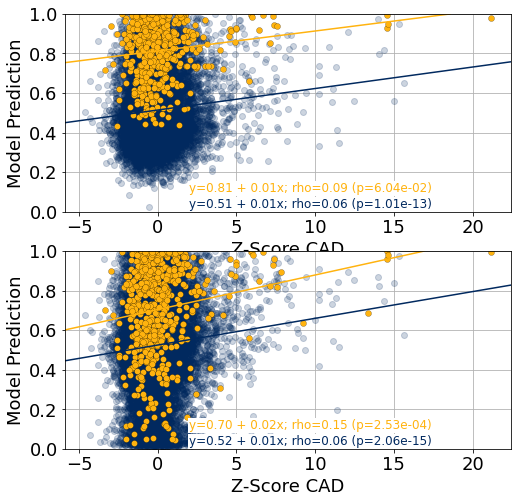

In [29]:
fig, axes = plt.subplots(2,1, figsize=(8,8))

for ax, pos, unk in zip(axes, [train_pos, holdout_pos], [train_unk, holdout_unk]):
    color_pos = np.asarray(["orange" for _ in pos])
    color_unk = np.asarray(["blue" for _ in unk])
    y_vals_pos = np.asarray([y for x, y in pos])
    y_vals_unk = np.asarray([y for x, y in unk])
    x_vals_pos = np.asarray([x for x, y in pos])
    x_vals_unk = np.asarray([x for x, y in unk])

    y_vals_pos = y_vals_pos[~np.isnan(y_vals_pos)]
    x_vals_pos = x_vals_pos[~np.isnan(y_vals_pos)]
    color_pos = color_pos[~np.isnan(y_vals_pos)]

    y_vals_unk = y_vals_unk[~np.isnan(y_vals_unk)]
    x_vals_unk = x_vals_unk[~np.isnan(y_vals_unk)]
    color_unk = color_unk[~np.isnan(y_vals_unk)]

    ax.grid(zorder=-5)
    ax.set_axisbelow(True)
    ax.scatter(x=x_vals_unk, y=y_vals_unk, color=darkblue, alpha=0.2)
    ax.scatter(x=x_vals_pos, y=y_vals_pos, color=orange, alpha=1, edgecolors="black", linewidth=0.2)

    rho = spearmanr(x_vals_pos, y_vals_pos)
    m, b = np.polyfit(x_vals_pos, y_vals_pos, 1)
    ax.axline((0, b), slope=m, color =orange)
    ax.text(2, 0.1, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=orange, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=12)

    rho = spearmanr(x_vals_unk, y_vals_unk)
    m, b = np.polyfit(x_vals_unk, y_vals_unk, 1)
    ax.axline((0, b), slope=m, color =darkblue)
    ax.text(2, 0.02, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=darkblue, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=12)
    ax.set_xlabel("Z-Score CAD")
    ax.set_ylabel("Model Prediction")
    ax.set_ylim((0,1))

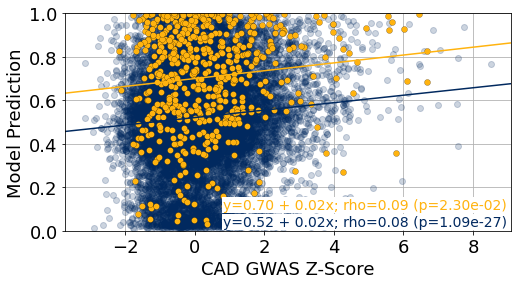

In [19]:
fig, axes = plt.subplots(figsize=(8,4))
plt.rcParams.update({'font.size': 18})
for ax, pos, unk in zip([axes], [holdout_pos], [holdout_unk]):
    color_pos = np.asarray(["orange" for _ in pos])
    color_unk = np.asarray(["blue" for _ in unk])
    y_vals_pos = np.asarray([y for x, y in pos])
    y_vals_unk = np.asarray([y for x, y in unk])
    x_vals_pos = np.asarray([x for x, y in pos])
    x_vals_unk = np.asarray([x for x, y in unk])

    y_vals_pos = y_vals_pos[~np.isnan(y_vals_pos)]
    x_vals_pos = x_vals_pos[~np.isnan(y_vals_pos)]
    color_pos = color_pos[~np.isnan(y_vals_pos)]

    y_vals_unk = y_vals_unk[~np.isnan(y_vals_unk)]
    x_vals_unk = x_vals_unk[~np.isnan(y_vals_unk)]
    color_unk = color_unk[~np.isnan(y_vals_unk)]

    ax.grid(zorder=-5)
    ax.set_axisbelow(True)
    ax.scatter(x=x_vals_unk, y=y_vals_unk, color=darkblue, alpha=0.2)
    ax.scatter(x=x_vals_pos, y=y_vals_pos, color=orange, alpha=1, edgecolors="black", linewidth=0.2)

    rho = spearmanr(x_vals_pos, y_vals_pos)
    m, b = np.polyfit(x_vals_pos, y_vals_pos, 1)
    ax.axline((0, b), slope=m, color =orange)
    ax.text(0.8, 0.1, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=orange, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=14)

    rho = spearmanr(x_vals_unk, y_vals_unk)
    m, b = np.polyfit(x_vals_unk, y_vals_unk, 1)
    ax.axline((0, b), slope=m, color =darkblue)
    ax.text(0.8, 0.02, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=darkblue, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=14)
    ax.set_xlabel("CAD GWAS Z-Score")
    ax.set_ylabel("Model Prediction")
    ax.set_ylim((0,1))

plt.savefig("cardiovascular_CAD.pdf", bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(figsize=(8,4))
plt.rcParams.update({'font.size': 18})
for ax, pos, unk in zip([axes], [holdout_pos], [holdout_unk]):
    color_pos = np.asarray(["orange" for _ in pos])
    color_unk = np.asarray(["blue" for _ in unk])
    y_vals_pos = np.asarray([y for x, y in pos])
    y_vals_unk = np.asarray([y for x, y in unk])
    x_vals_pos = np.asarray([x for x, y in pos])
    x_vals_unk = np.asarray([x for x, y in unk])

    y_vals_pos = y_vals_pos[~np.isnan(y_vals_pos)]
    x_vals_pos = x_vals_pos[~np.isnan(y_vals_pos)]
    color_pos = color_pos[~np.isnan(y_vals_pos)]

    y_vals_unk = y_vals_unk[~np.isnan(y_vals_unk)]
    x_vals_unk = x_vals_unk[~np.isnan(y_vals_unk)]
    color_unk = color_unk[~np.isnan(y_vals_unk)]

    ax.grid(zorder=-5)
    ax.set_axisbelow(True)
    ax.scatter(x=x_vals_unk, y=y_vals_unk, color=darkblue, alpha=0.2)
    ax.scatter(x=x_vals_pos, y=y_vals_pos, color=orange, alpha=1, edgecolors="black", linewidth=0.2)

    rho = spearmanr(x_vals_pos, y_vals_pos)
    m, b = np.polyfit(x_vals_pos, y_vals_pos, 1)
    ax.axline((0, b), slope=m, color =orange)
    ax.text(2, 0.1, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=orange, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=12)

    rho = spearmanr(x_vals_unk, y_vals_unk)
    m, b = np.polyfit(x_vals_unk, y_vals_unk, 1)
    ax.axline((0, b), slope=m, color =darkblue)
    ax.text(2, 0.02, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=darkblue, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=12)
    ax.set_xlabel("Z-Score CAD")
    ax.set_ylabel("Model Prediction")
    ax.set_ylim((0,1))

plt.savefig("cardiovascular_CAD.pdf", bbox_inches='tight')

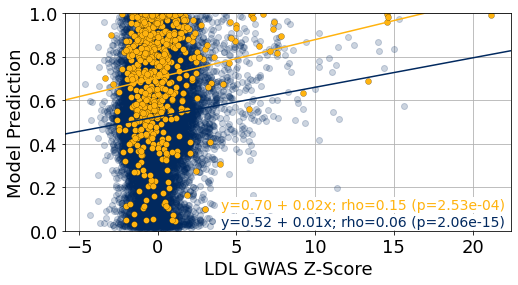

In [22]:
import matplotlib.pyplot as plt

gwas = pd.read_csv("/home/icb/florin.ratajczak/ppi-core-genes/data/gwas/LDL.genes.out", sep=" ", header=0, index_col=0)
id2entrez = {value: key for key, value in prepro.entrez2id.items()}
"""
train_pos=[]
train_unk=[]
holdout_pos=[]
holdout_unk=[]

for hgnc in hgncs:
    results = handler.get_results_for_gene(hgnc).squeeze() # ["truth", "decision", "prediction", "train", "val", "test"]
    entrez = id2entrez[prepro.hgnc2id[hgnc]]
    value = gwas.loc[entrez, "ZSTAT"]
    if results[0, 0] == 1:
        if results[:,3].sum() >= 1:
            train_pos.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_pos.append((value, results[:,2][results[:,4].astype(np.bool8()) + results[:,5].astype(np.bool8())].mean().item()))
    else:
        if results[:,3].sum() >= 1:
            train_unk.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_unk.append((value, results[:,2][(results[:,4] + results[:,5]).astype(np.bool8)].mean().item()))
"""
fig, axes = plt.subplots(figsize=(8,4))
plt.rcParams.update({'font.size': 18})
for ax, pos, unk in zip([axes], [holdout_pos], [holdout_unk]):
    color_pos = np.asarray(["orange" for _ in pos])
    color_unk = np.asarray(["blue" for _ in unk])
    y_vals_pos = np.asarray([y for x, y in pos])
    y_vals_unk = np.asarray([y for x, y in unk])
    x_vals_pos = np.asarray([x for x, y in pos])
    x_vals_unk = np.asarray([x for x, y in unk])

    y_vals_pos = y_vals_pos[~np.isnan(y_vals_pos)]
    x_vals_pos = x_vals_pos[~np.isnan(y_vals_pos)]
    color_pos = color_pos[~np.isnan(y_vals_pos)]

    y_vals_unk = y_vals_unk[~np.isnan(y_vals_unk)]
    x_vals_unk = x_vals_unk[~np.isnan(y_vals_unk)]
    color_unk = color_unk[~np.isnan(y_vals_unk)]

    ax.grid(zorder=-5)
    ax.set_axisbelow(True)
    ax.scatter(x=x_vals_unk, y=y_vals_unk, color=darkblue, alpha=0.2)
    ax.scatter(x=x_vals_pos, y=y_vals_pos, color=orange, alpha=1, edgecolors="black", linewidth=0.2)

    rho = spearmanr(x_vals_pos, y_vals_pos)
    m, b = np.polyfit(x_vals_pos, y_vals_pos, 1)
    ax.axline((0, b), slope=m, color =orange)
    ax.text(4, 0.1, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=orange, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=14)

    rho = spearmanr(x_vals_unk, y_vals_unk)
    m, b = np.polyfit(x_vals_unk, y_vals_unk, 1)
    ax.axline((0, b), slope=m, color =darkblue)
    ax.text(4, 0.02, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=darkblue, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=14)
    ax.set_xlabel("LDL GWAS Z-Score")
    ax.set_ylabel("Model Prediction")
    ax.set_ylim((0,1))

plt.savefig("cardiovascular_LDL.svg", bbox_inches='tight')

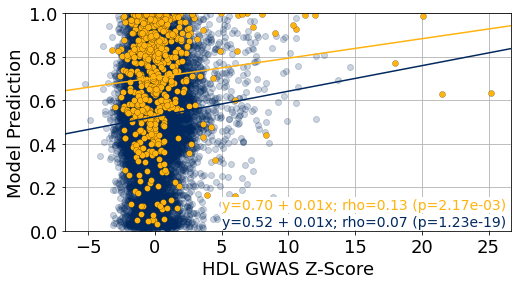

In [24]:
import matplotlib.pyplot as plt

gwas = pd.read_csv("/home/icb/florin.ratajczak/ppi-core-genes/data/gwas/HDL.genes.out", sep=" ", header=0, index_col=0)
id2entrez = {value: key for key, value in prepro.entrez2id.items()}
"""
train_pos=[]
train_unk=[]
holdout_pos=[]
holdout_unk=[]

for hgnc in hgncs:
    results = handler.get_results_for_gene(hgnc).squeeze() # ["truth", "decision", "prediction", "train", "val", "test"]
    entrez = id2entrez[prepro.hgnc2id[hgnc]]
    value = gwas.loc[entrez, "ZSTAT"]
    if results[0, 0] == 1:
        if results[:,3].sum() >= 1:
            train_pos.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_pos.append((value, results[:,2][results[:,4].astype(np.bool8()) + results[:,5].astype(np.bool8())].mean().item()))
    else:
        if results[:,3].sum() >= 1:
            train_unk.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_unk.append((value, results[:,2][(results[:,4] + results[:,5]).astype(np.bool8)].mean().item()))
"""
fig, axes = plt.subplots(figsize=(8,4))
plt.rcParams.update({'font.size': 18})
for ax, pos, unk in zip([axes], [holdout_pos], [holdout_unk]):
    color_pos = np.asarray(["orange" for _ in pos])
    color_unk = np.asarray(["blue" for _ in unk])
    y_vals_pos = np.asarray([y for x, y in pos])
    y_vals_unk = np.asarray([y for x, y in unk])
    x_vals_pos = np.asarray([x for x, y in pos])
    x_vals_unk = np.asarray([x for x, y in unk])

    y_vals_pos = y_vals_pos[~np.isnan(y_vals_pos)]
    x_vals_pos = x_vals_pos[~np.isnan(y_vals_pos)]
    color_pos = color_pos[~np.isnan(y_vals_pos)]

    y_vals_unk = y_vals_unk[~np.isnan(y_vals_unk)]
    x_vals_unk = x_vals_unk[~np.isnan(y_vals_unk)]
    color_unk = color_unk[~np.isnan(y_vals_unk)]

    ax.grid(zorder=-5)
    ax.set_axisbelow(True)
    ax.scatter(x=x_vals_unk, y=y_vals_unk, color=darkblue, alpha=0.2)
    ax.scatter(x=x_vals_pos, y=y_vals_pos, color=orange, alpha=1, edgecolors="black", linewidth=0.2)

    rho = spearmanr(x_vals_pos, y_vals_pos)
    m, b = np.polyfit(x_vals_pos, y_vals_pos, 1)
    ax.axline((0, b), slope=m, color =orange)
    ax.text(5, 0.1, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=orange, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=14)

    rho = spearmanr(x_vals_unk, y_vals_unk)
    m, b = np.polyfit(x_vals_unk, y_vals_unk, 1)
    ax.axline((0, b), slope=m, color =darkblue)
    ax.text(5, 0.02, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=darkblue, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=14)
    ax.set_xlabel("HDL GWAS Z-Score")
    ax.set_ylabel("Model Prediction")
    ax.set_ylim((0,1))

plt.savefig("cardiovascular_HDL.svg", bbox_inches='tight')

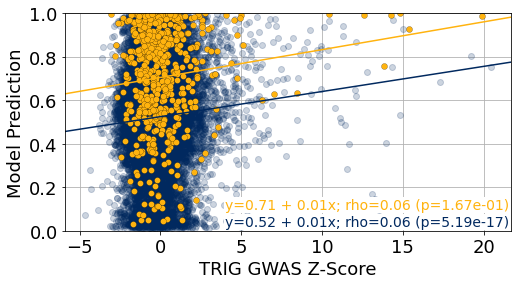

In [26]:
import matplotlib.pyplot as plt

gwas = pd.read_csv("/home/icb/florin.ratajczak/ppi-core-genes/data/gwas/TRIG.genes.out", sep=" ", header=0, index_col=0)
id2entrez = {value: key for key, value in prepro.entrez2id.items()}
"""
train_pos=[]
train_unk=[]
holdout_pos=[]
holdout_unk=[]

for hgnc in hgncs:
    results = handler.get_results_for_gene(hgnc).squeeze() # ["truth", "decision", "prediction", "train", "val", "test"]
    entrez = id2entrez[prepro.hgnc2id[hgnc]]
    value = gwas.loc[entrez, "ZSTAT"]
    if results[0, 0] == 1:
        if results[:,3].sum() >= 1:
            train_pos.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_pos.append((value, results[:,2][results[:,4].astype(np.bool8()) + results[:,5].astype(np.bool8())].mean().item()))
    else:
        if results[:,3].sum() >= 1:
            train_unk.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_unk.append((value, results[:,2][(results[:,4] + results[:,5]).astype(np.bool8)].mean().item()))
"""
fig, axes = plt.subplots(figsize=(8,4))
plt.rcParams.update({'font.size': 18})
for ax, pos, unk in zip([axes], [holdout_pos], [holdout_unk]):
    color_pos = np.asarray(["orange" for _ in pos])
    color_unk = np.asarray(["blue" for _ in unk])
    y_vals_pos = np.asarray([y for x, y in pos])
    y_vals_unk = np.asarray([y for x, y in unk])
    x_vals_pos = np.asarray([x for x, y in pos])
    x_vals_unk = np.asarray([x for x, y in unk])

    y_vals_pos = y_vals_pos[~np.isnan(y_vals_pos)]
    x_vals_pos = x_vals_pos[~np.isnan(y_vals_pos)]
    color_pos = color_pos[~np.isnan(y_vals_pos)]

    y_vals_unk = y_vals_unk[~np.isnan(y_vals_unk)]
    x_vals_unk = x_vals_unk[~np.isnan(y_vals_unk)]
    color_unk = color_unk[~np.isnan(y_vals_unk)]

    ax.grid(zorder=-5)
    ax.set_axisbelow(True)
    ax.scatter(x=x_vals_unk, y=y_vals_unk, color=darkblue, alpha=0.2)
    ax.scatter(x=x_vals_pos, y=y_vals_pos, color=orange, alpha=1, edgecolors="black", linewidth=0.2)

    rho = spearmanr(x_vals_pos, y_vals_pos)
    m, b = np.polyfit(x_vals_pos, y_vals_pos, 1)
    ax.axline((0, b), slope=m, color =orange)
    ax.text(4, 0.1, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=orange, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=14)

    rho = spearmanr(x_vals_unk, y_vals_unk)
    m, b = np.polyfit(x_vals_unk, y_vals_unk, 1)
    ax.axline((0, b), slope=m, color =darkblue)
    ax.text(4, 0.02, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e})".format(b.item(), m.item(), rho[0], rho[1]), color=darkblue, bbox=dict(facecolor='white', edgecolor='none', pad=1), fontsize=14)
    ax.set_xlabel("TRIG GWAS Z-Score")
    ax.set_ylabel("Model Prediction")
    ax.set_ylim((0,1))

plt.savefig("cardiovascular_TRIG.svg", bbox_inches='tight')

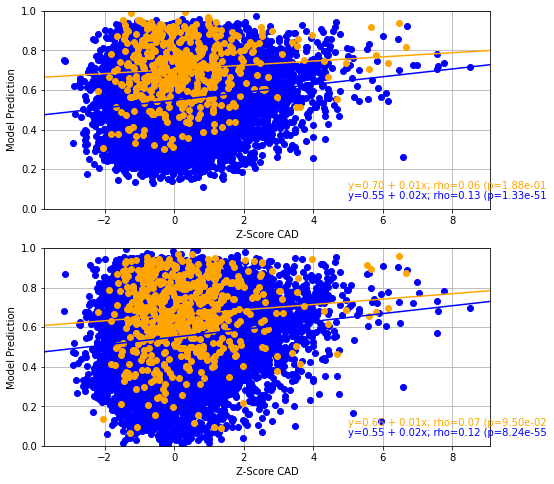

In [79]:
import matplotlib.pyplot as plt

gwas = pd.read_csv("/home/icb/florin.ratajczak/ppi-core-genes/data/gwas/HDL.genes.out", sep=" ", header=0, index_col=0)
id2entrez = {value: key for key, value in prepro.entrez2id.items()}

train_pos=[]
train_unk=[]
holdout_pos=[]
holdout_unk=[]

for hgnc in hgncs:
    results = handler.get_results_for_gene(hgnc).squeeze() # ["truth", "decision", "prediction", "train", "val", "test"]
    entrez = id2entrez[prepro.hgnc2id[hgnc]]
    value = gwas.loc[entrez, "ZSTAT"]
    if results[0, 0] == 1:
        if results[:,3].sum() >= 1:
            train_pos.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_pos.append((value, results[:,2][results[:,4].astype(np.bool8()) + results[:,5].astype(np.bool8())].mean().item()))
    else:
        if results[:,3].sum() >= 1:
            train_unk.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_unk.append((value, results[:,2][(results[:,4] + results[:,5]).astype(np.bool8)].mean().item()))

fig, axes = plt.subplots(2,1, figsize=(8,8))

for ax, pos, unk in zip(axes, [train_pos, holdout_pos], [train_unk, holdout_unk]):
    color_pos = np.asarray(["orange" for _ in pos])
    color_unk = np.asarray(["blue" for _ in unk])
    y_vals_pos = np.asarray([y for x, y in pos])
    y_vals_unk = np.asarray([y for x, y in unk])
    x_vals_pos = np.asarray([x for x, y in pos])
    x_vals_unk = np.asarray([x for x, y in unk])

    y_vals_pos = y_vals_pos[~np.isnan(y_vals_pos)]
    x_vals_pos = x_vals_pos[~np.isnan(y_vals_pos)]
    color_pos = color_pos[~np.isnan(y_vals_pos)]

    y_vals_unk = y_vals_unk[~np.isnan(y_vals_unk)]
    x_vals_unk = x_vals_unk[~np.isnan(y_vals_unk)]
    color_unk = color_unk[~np.isnan(y_vals_unk)]

    ax.grid(zorder=-5)
    ax.set_axisbelow(True)
    ax.scatter(x=x_vals_unk, y=y_vals_unk, color="blue")
    ax.scatter(x=x_vals_pos, y=y_vals_pos, color="orange")

    rho = spearmanr(x_vals_pos, y_vals_pos)
    m, b = np.polyfit(x_vals_pos, y_vals_pos, 1)
    ax.axline((0, b), slope=m, color ="orange")
    ax.text(5, 0.1, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e}".format(b.item(), m.item(), rho[0], rho[1]), color="orange")

    rho = spearmanr(x_vals_unk, y_vals_unk)
    m, b = np.polyfit(x_vals_unk, y_vals_unk, 1)
    ax.axline((0, b), slope=m, color ="blue")
    ax.text(5, 0.05, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e}".format(b.item(), m.item(), rho[0], rho[1]), color="blue")
    ax.set_xlabel("Z-Score TRIG")
    ax.set_ylabel("Model Prediction")
    ax.set_ylim((0,1))

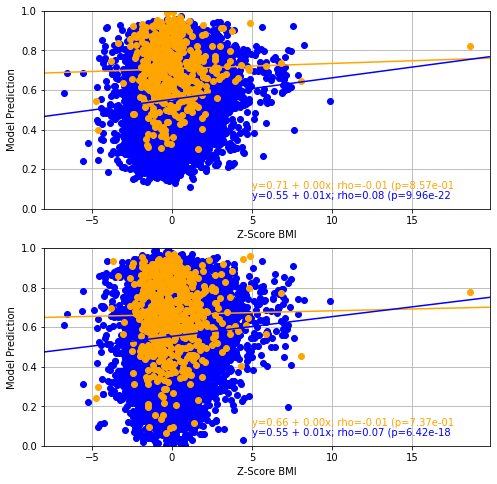

In [80]:
import matplotlib.pyplot as plt

gwas = pd.read_csv("/home/icb/florin.ratajczak/ppi-core-genes/data/gwas/BMI.genes.out", sep=" ", header=0, index_col=0)
id2entrez = {value: key for key, value in prepro.entrez2id.items()}

train_pos=[]
train_unk=[]
holdout_pos=[]
holdout_unk=[]

for hgnc in hgncs:
    results = handler.get_results_for_gene(hgnc).squeeze() # ["truth", "decision", "prediction", "train", "val", "test"]
    entrez = id2entrez[prepro.hgnc2id[hgnc]]
    value = gwas.loc[entrez, "ZSTAT"]
    if results[0, 0] == 1:
        if results[:,3].sum() >= 1:
            train_pos.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_pos.append((value, results[:,2][results[:,4].astype(np.bool8()) + results[:,5].astype(np.bool8())].mean().item()))
    else:
        if results[:,3].sum() >= 1:
            train_unk.append((value, results[:,2][results[:,3].astype(np.bool8())].mean().item()))
        holdout_unk.append((value, results[:,2][(results[:,4] + results[:,5]).astype(np.bool8)].mean().item()))

fig, axes = plt.subplots(2,1, figsize=(8,8))

for ax, pos, unk in zip(axes, [train_pos, holdout_pos], [train_unk, holdout_unk]):
    color_pos = np.asarray(["orange" for _ in pos])
    color_unk = np.asarray(["blue" for _ in unk])
    y_vals_pos = np.asarray([y for x, y in pos])
    y_vals_unk = np.asarray([y for x, y in unk])
    x_vals_pos = np.asarray([x for x, y in pos])
    x_vals_unk = np.asarray([x for x, y in unk])

    y_vals_pos = y_vals_pos[~np.isnan(y_vals_pos)]
    x_vals_pos = x_vals_pos[~np.isnan(y_vals_pos)]
    color_pos = color_pos[~np.isnan(y_vals_pos)]

    y_vals_unk = y_vals_unk[~np.isnan(y_vals_unk)]
    x_vals_unk = x_vals_unk[~np.isnan(y_vals_unk)]
    color_unk = color_unk[~np.isnan(y_vals_unk)]

    ax.grid(zorder=-5)
    ax.set_axisbelow(True)
    ax.scatter(x=x_vals_unk, y=y_vals_unk, color="blue")
    ax.scatter(x=x_vals_pos, y=y_vals_pos, color="orange")

    rho = spearmanr(x_vals_pos, y_vals_pos)
    m, b = np.polyfit(x_vals_pos, y_vals_pos, 1)
    ax.axline((0, b), slope=m, color ="orange")
    ax.text(5, 0.1, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e}".format(b.item(), m.item(), rho[0], rho[1]), color="orange")

    rho = spearmanr(x_vals_unk, y_vals_unk)
    m, b = np.polyfit(x_vals_unk, y_vals_unk, 1)
    ax.axline((0, b), slope=m, color ="blue")
    ax.text(5, 0.05, "y={:.2f} + {:.2f}x; rho={:.2f} (p={:.2e}".format(b.item(), m.item(), rho[0], rho[1]), color="blue")
    ax.set_xlabel("Z-Score BMI")
    ax.set_ylabel("Model Prediction")
    ax.set_ylim((0,1))

In [57]:
m, b = np.polyfit(x_vals, y_vals, 1)

In [58]:
r

SpearmanrResult(correlation=0.18704200757310513, pvalue=8.376280641803968e-110)